In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('TSLA.csv') 

In [14]:
df.dropna(inplace=True)

In [15]:
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-10-2022,245.009995,246.669998,233.270004,240.809998,240.809998,86982700
1,06-10-2022,239.440002,244.580002,235.350006,238.130005,238.130005,69298400
2,07-10-2022,233.940002,234.570007,222.020004,223.070007,223.070007,83916800
3,10-10-2022,223.929993,226.990005,218.360001,222.960007,222.960007,67925000
4,11-10-2022,220.949997,225.750000,215.000000,216.500000,216.500000,77013200
5,12-10-2022,215.330002,219.300003,211.509995,217.240005,217.240005,66860700
6,13-10-2022,208.300003,222.990005,206.220001,221.720001,221.720001,91483000
7,14-10-2022,224.009995,226.259995,204.160004,204.990005,204.990005,94124500
8,17-10-2022,210.039993,221.860001,209.449997,219.350006,219.350006,79428800
9,18-10-2022,229.500000,229.820007,217.250000,220.190002,220.190002,75891900


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [17]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,205.490558,210.022470,200.759084,205.547649,205.547649,1.334926e+08
std,43.930415,44.290499,43.563631,43.951559,43.951559,4.212314e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,5.067270e+07
25%,176.635002,182.419998,172.504998,178.474998,178.474998,1.019894e+08
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.270627e+08
75%,244.904999,250.654998,241.255005,244.945000,244.945000,1.605998e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,3.065906e+08


In [18]:
df.shape

(251, 7)

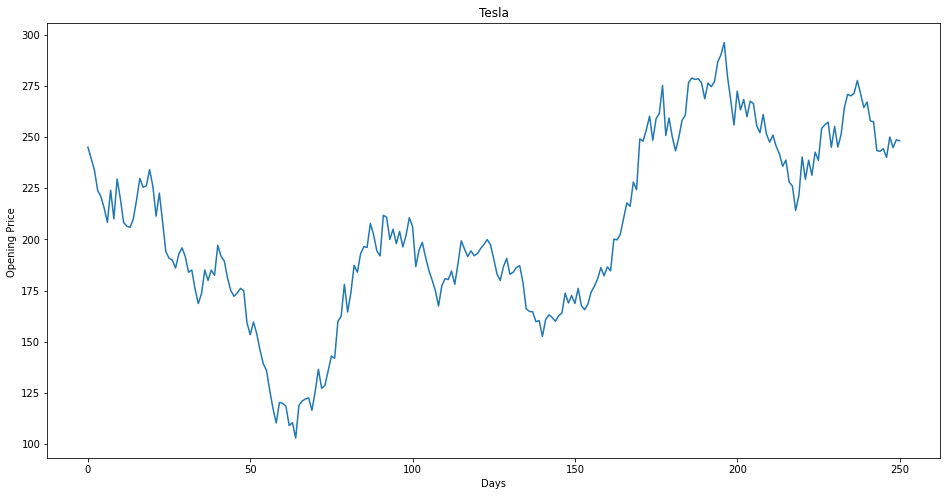

In [19]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Opening Price ')
plt.plot(df['Open'])
plt.show()

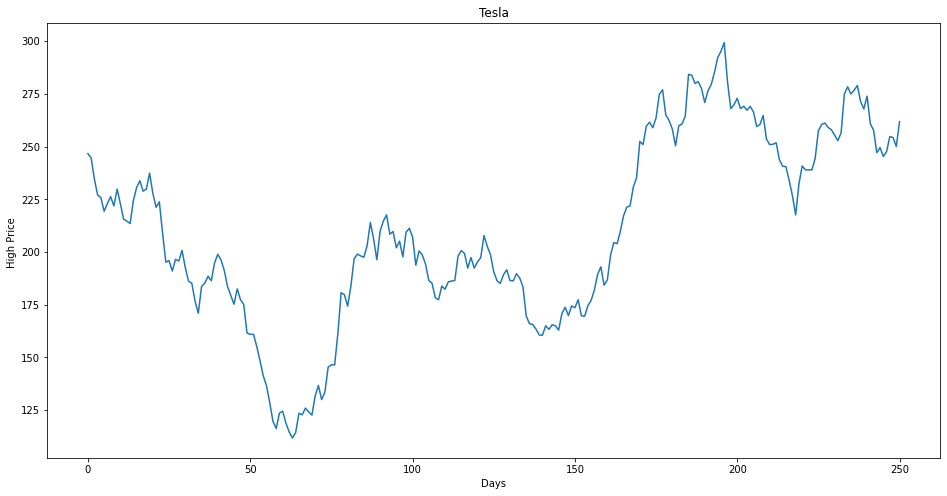

In [20]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('High Price ')
plt.plot(df['High'])
plt.show()

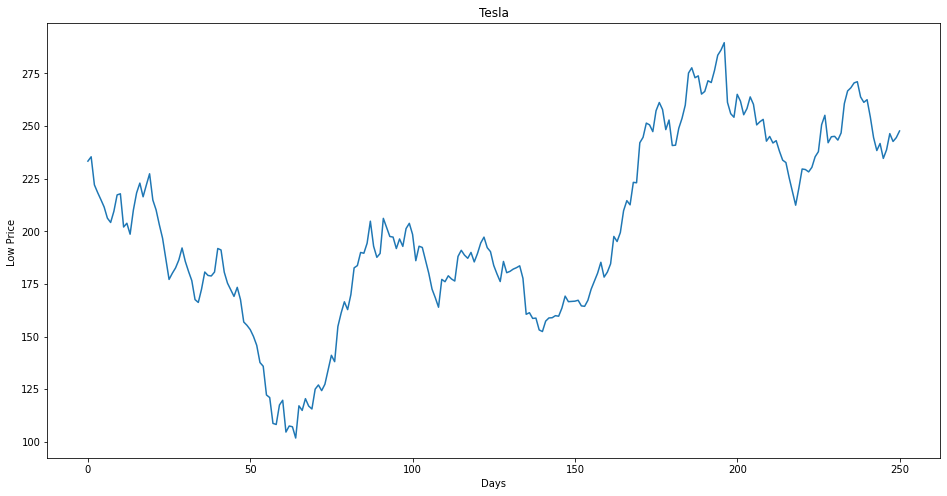

In [21]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Low Price ')
plt.plot(df['Low'])
plt.show()

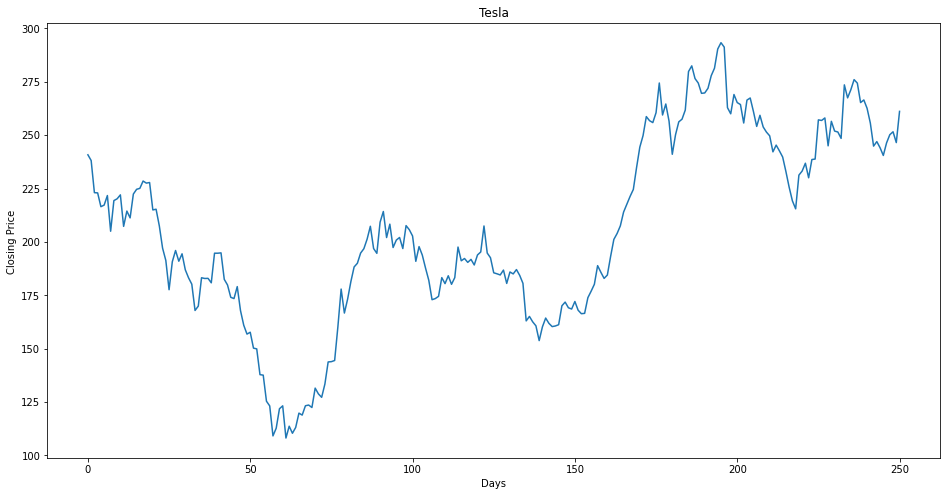

In [22]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Closing Price ')
plt.plot(df['Close'])
plt.show()

In [23]:
df2 = df['Close']

In [24]:
df2.tail()

246    246.380005
247    250.220001
248    251.600006
249    246.529999
250    261.160004
Name: Close, dtype: float64

In [25]:
df2 = pd.DataFrame(df2)     

In [26]:
df2.tail()

,Close
246,246.380005
247,250.220001
248,251.600006
249,246.529999
250,261.160004


In [27]:
future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)

In [28]:
df2.tail()

,Close,Prediction
246,246.380005,NaN
247,250.220001,NaN
248,251.600006,NaN
249,246.529999,NaN
250,261.160004,NaN


In [29]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]

C:\Users\bhuva\AppData\Local\Temp/ipykernel_15384/3905676318.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [30]:
y = np.array(df2['Prediction'])[:-future_days]

# Linear and Decision Tree Regression

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [33]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [34]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

C:\Users\bhuva\AppData\Local\Temp/ipykernel_15384/2356529481.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


In [35]:
tree_prediction = tree.predict(x_future)


In [36]:
lr_prediction = lr.predict(x_future)

In [37]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\bhuva\AppData\Local\Temp/ipykernel_15384/4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Next 100 Days

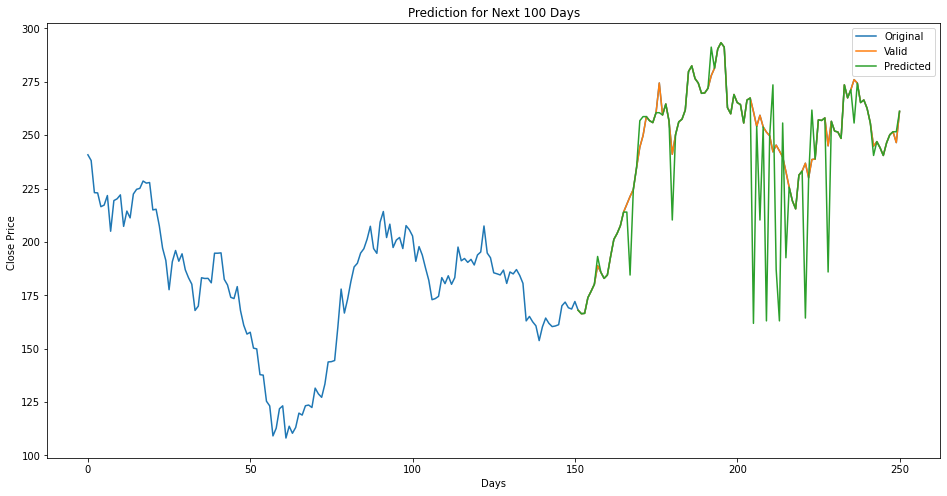

In [38]:
plt.figure(figsize=(16,8))
plt.title("Prediction for Next 100 Days")
plt.xlabel('Days')
plt.ylabel('Close Price ')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()